# Customer Segmentation using K-Means Clustering Analysis

## 1. Introduction

In this notebook, we will perform customer segmentation using the Mall Customer Segmentation dataset.

This dataset includes information about customers such as age, annual income, and spending score.

Our goal is to use K-Means Clustering to segment customers into different groups based on their behavior and characteristics.

### Steps to solve the problem:
- Importing Libraries.
- Data Exploration.
- Data Visualization.
- Clustering using K-Means.
- Selection of Clusters.
- Plotting the Cluster Boundary and Clusters.
- 3D Plot of Clusters.

## 2. Importing Libraries

First, we import the necessary libraries for our analysis:

- `numpy` and `pandas` are essential for data manipulation and analysis.
- `matplotlib` and `seaborn` are used for static data visualizations.
- `plotly` is used for creating interactive plots.
- `sklearn` provides the KMeans algorithm for clustering.
- `warnings` helps manage and suppress warnings that might clutter the output.

In [92]:
# For numerical operations and linear algebra
import numpy as np

# For data processing and CSV file handling
import pandas as pd 

# For creating static visualizations
import matplotlib.pyplot as plt 

# For advanced statistical visualizations
import seaborn as sns

# For interactive visualizations
import plotly as py 

# For creating 3D plots
import plotly.graph_objs as go 

# For applying K-Means clustering algorithm
from sklearn.cluster import KMeans 

# To manage warnings during execution
import warnings 

# For interacting with the operating system
import os 

# Ignore warnings to keep the output clean
warnings.filterwarnings("ignore") 

# Initialize Plotly for interactive plots
py.offline.init_notebook_mode(connected = True) 

## 3. Data Exploration

Load the dataset and perform initial exploration to understand its structure and content:

- `df.head()`: Displays the first few rows to get a glimpse of the data.
- `df.shape`: Provides the number of rows and columns in the dataset.
- `df.describe()`: Offers a summary of statistics for numerical columns.
- `df.dtypes`: Shows the data types of each column to ensure they are as expected.
- `df.isnull().sum()`: Identifies missing values that need to be handled before analysis.


In [97]:
# Read the dataset into a dataframe
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
df.head() 

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [99]:
# Get the dimensions of the dataset
df.shape 

(200, 5)

In [101]:
# Get statistical summary of numerical columns
df.describe() 

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [103]:
# Check the data types of each column
df.dtypes 

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [105]:
# Check for missing values in the dataset
df.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 4. Data Visualization

Visualize the data to understand the distribution and relationships between features:

- **Histograms**: Show the distribution of individual features.
- **Count Plot**: Reveals the distribution of categorical variables (e.g., gender).
- **Scatter Plots**: Illustrate relationships between pairs of features.
- **Violin and Swarm Plots**: Provide a more detailed view of the distribution of numerical features across categories.

In [108]:
plt.style.use('fivethirtyeight')

### Histograms

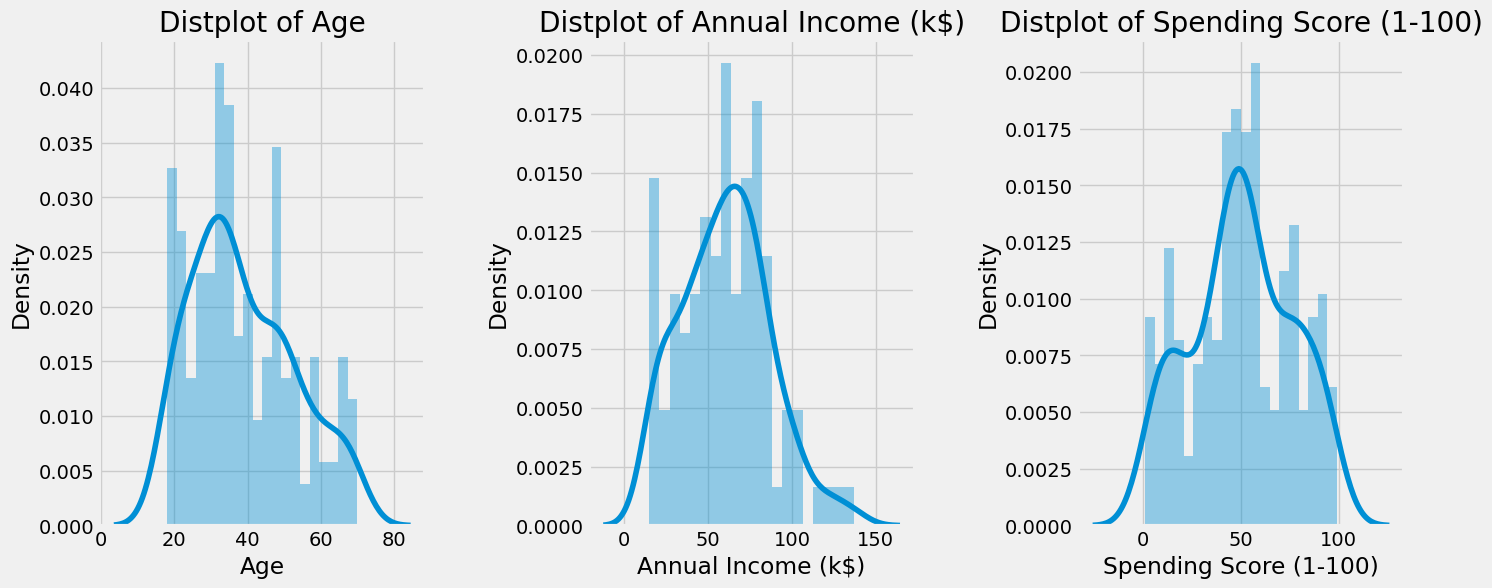

In [111]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Count Plot of Gender

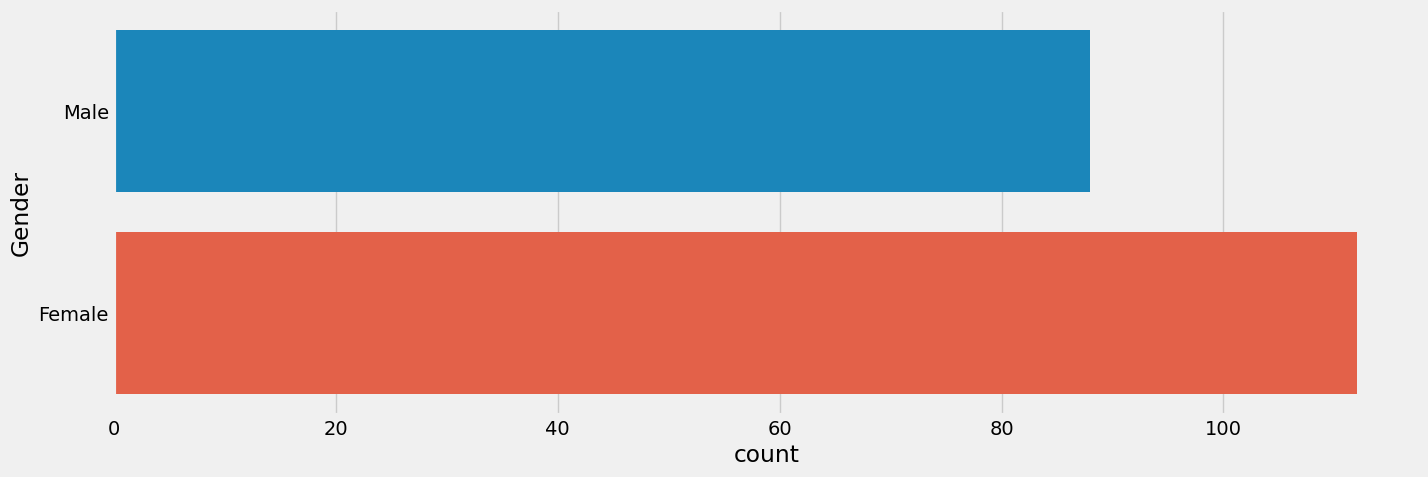

In [114]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### Plotting Relationships between Age , Annual Income and Spending Score

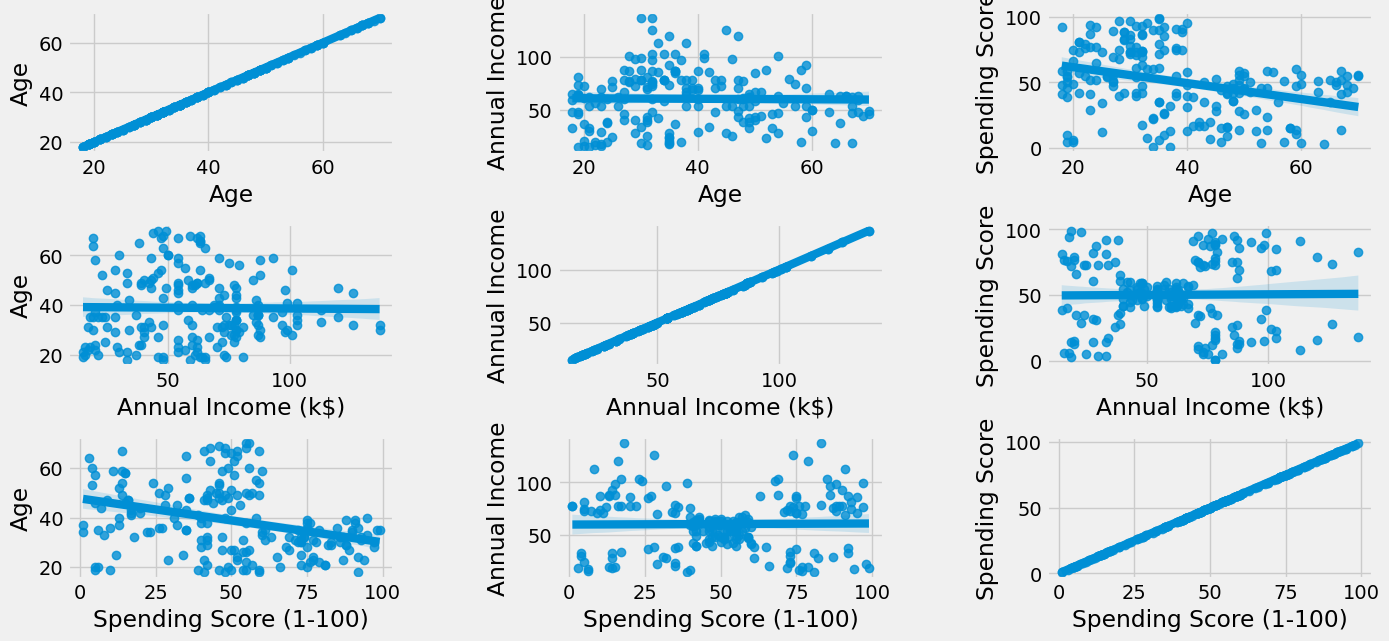

In [117]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

### Scatter Plots

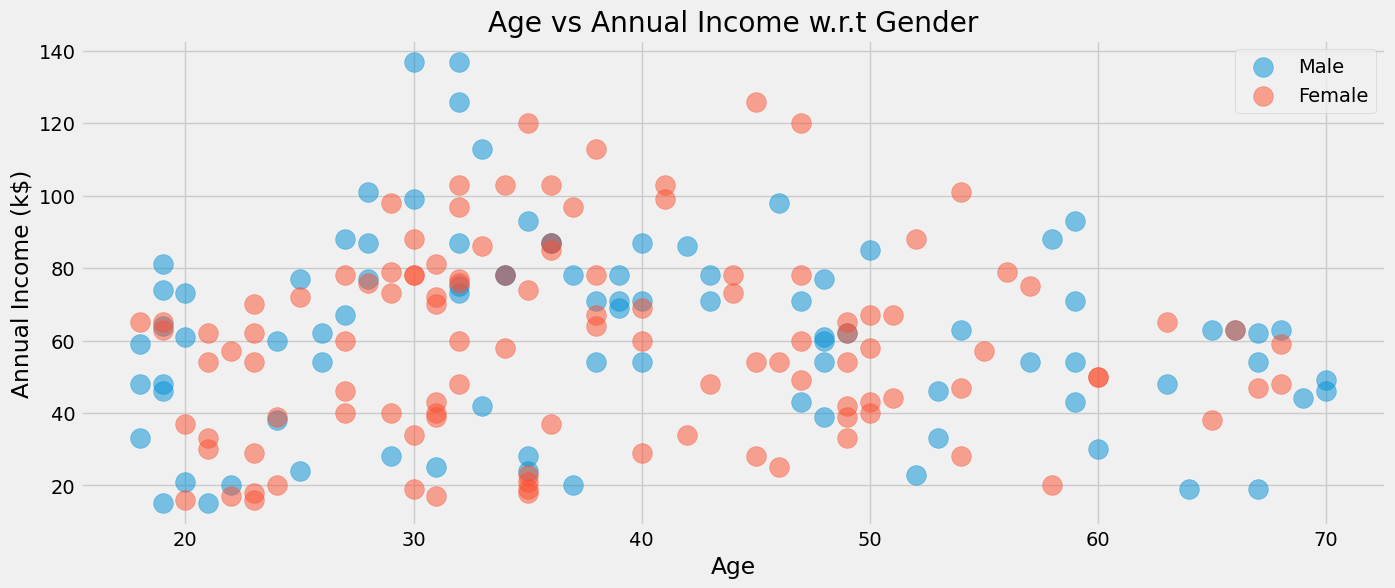

In [120]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

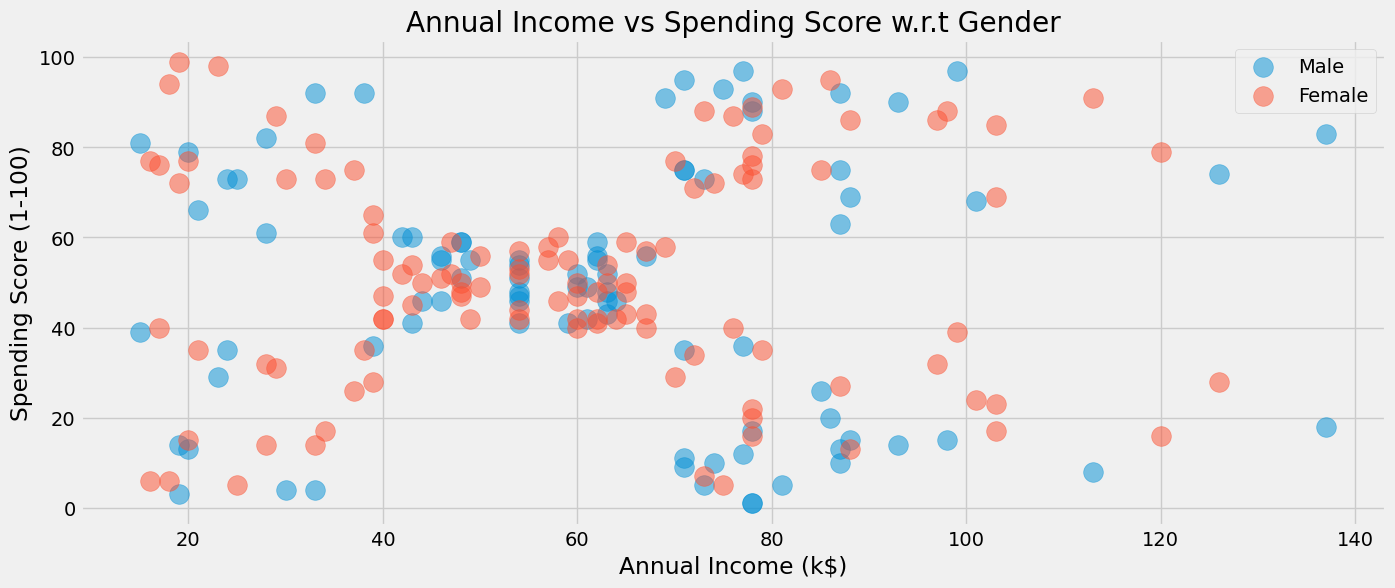

In [122]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

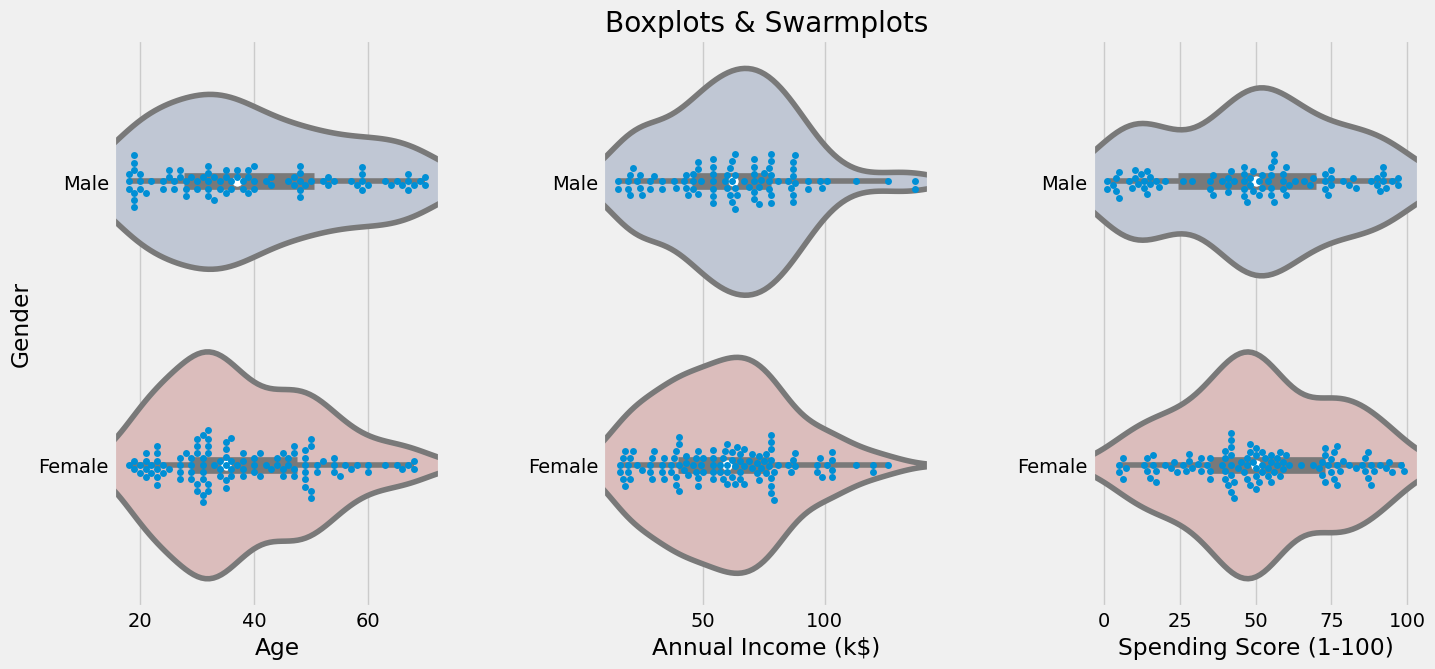

In [125]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## 5. Clustering using K-Means

We will use the K-Means Clustering algorithm to segment customers based on their characteristics. K-Means is an unsupervised learning algorithm that groups data into clusters based on their similarity. 

In this analysis, we will explore clustering based on different feature combinations:
- **Age and Spending Score**
- **Annual Income and Spending Score**
- **Age, Annual Income, and Spending Score**

For each combination, we will:
1. Fit the K-Means algorithm to the data.
2. Determine the optimal number of clusters.
3. Visualize the clusters and their centroids.

### 5.1 Segmentation using Age and Spending Score

In this section, we apply the K-Means clustering algorithm to segment customers based on their **Age** and **Spending Score**.

We start by fitting the model with different numbers of clusters and use the elbow method to determine the optimal number of clusters.

We then visualize the clusters and their centroids to understand the grouping of customers based on these two features.

In [129]:
# Segmentation using Age and Spending Score
X1 = df[['Age', 'Spending Score (1-100)']].values

# Determine the optimal number of clusters using inertia
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

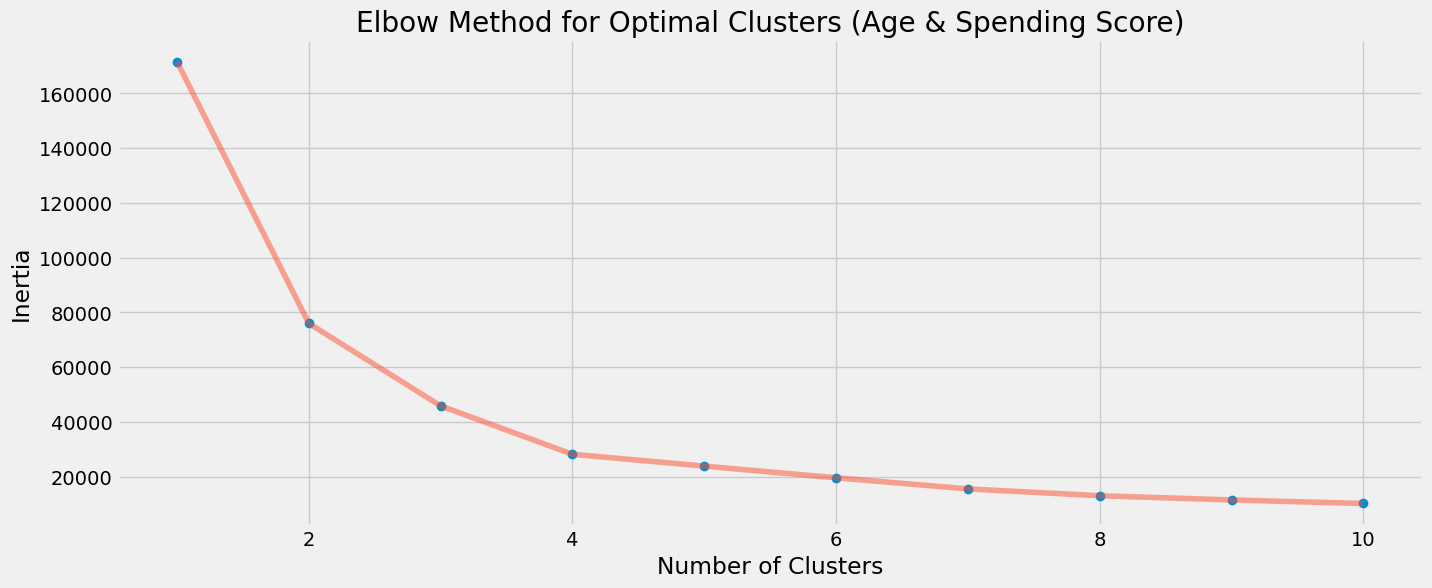

In [131]:
# Plot inertia to determine the optimal number of clusters
plt.figure(figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters (Age & Spending Score)')
plt.show()

In [133]:
# Fit K-Means with the chosen number of clusters (e.g., 4)
algorithm = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [135]:
# Plot clusters and centroids
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)

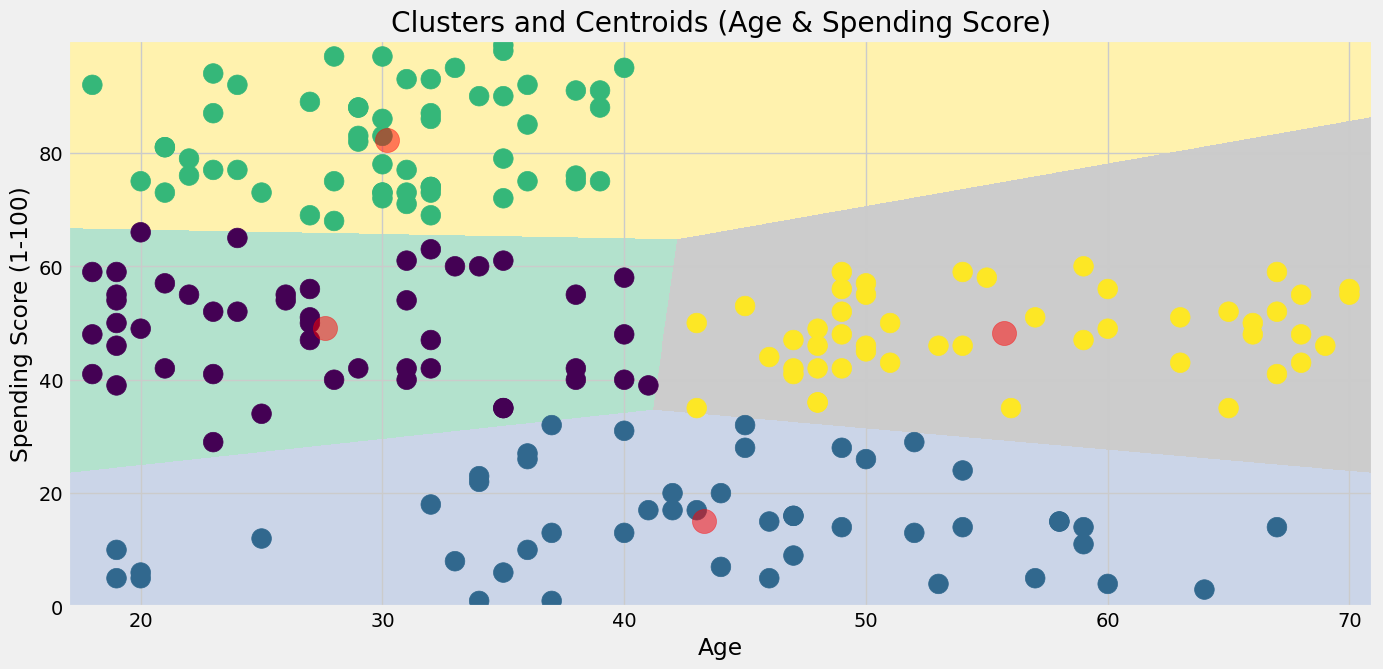

In [137]:
plt.figure(figsize=(15, 7))
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
plt.scatter(X1[:, 0], X1[:, 1], c=labels1, s=200)
plt.scatter(centroids1[:, 0], centroids1[:, 1], s=300, c='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters and Centroids (Age & Spending Score)')
plt.show()

### 5.2 Segmentation using Annual Income and Spending Score

Here, we perform clustering based on **Annual Income** and **Spending Score**.

Similar to the previous segmentation, we use the elbow method to find the optimal number of clusters.

The results are visualized to show how customers are grouped based on their income and spending behavior.


In [140]:
# Segmentation using Annual Income and Spending Score
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Determine the optimal number of clusters using inertia
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

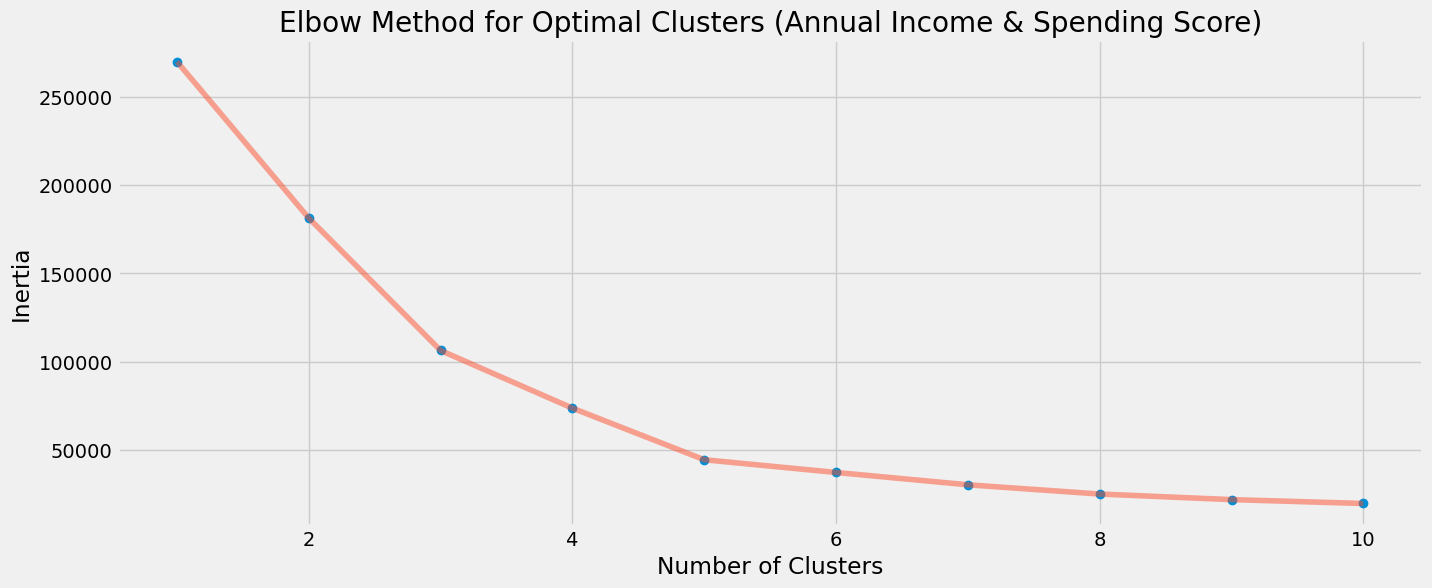

In [142]:
# Plot inertia to determine the optimal number of clusters
plt.figure(figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters (Annual Income & Spending Score)')
plt.show()

In [144]:
# Fit K-Means with the chosen number of clusters (e.g., 5)
algorithm = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [146]:
# Plot clusters and centroids
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z2 = Z2.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.imshow(Z2, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
plt.scatter(X2[:, 0], X2[:, 1], c=labels2, s=200)
plt.scatter(centroids2[:, 0], centroids2[:, 1], s=300, c='red', alpha=0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters and Centroids (Annual Income & Spending Score)')
plt.show()

### 5.3 Segmentation using Age, Annual Income, and Spending Score

In this section, we extend our analysis to include **Age**, **Annual Income**, and **Spending Score** for clustering.

We use a 3D plot to visualize the clusters in three dimensions, providing a comprehensive view of how customers are segmented based on these three features.

The optimal number of clusters is determined, and the results are analyzed to gain deeper insights into customer segmentation.


In [150]:
# Segmentation using Age, Annual Income, and Spending Score
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Determine the optimal number of clusters using inertia
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

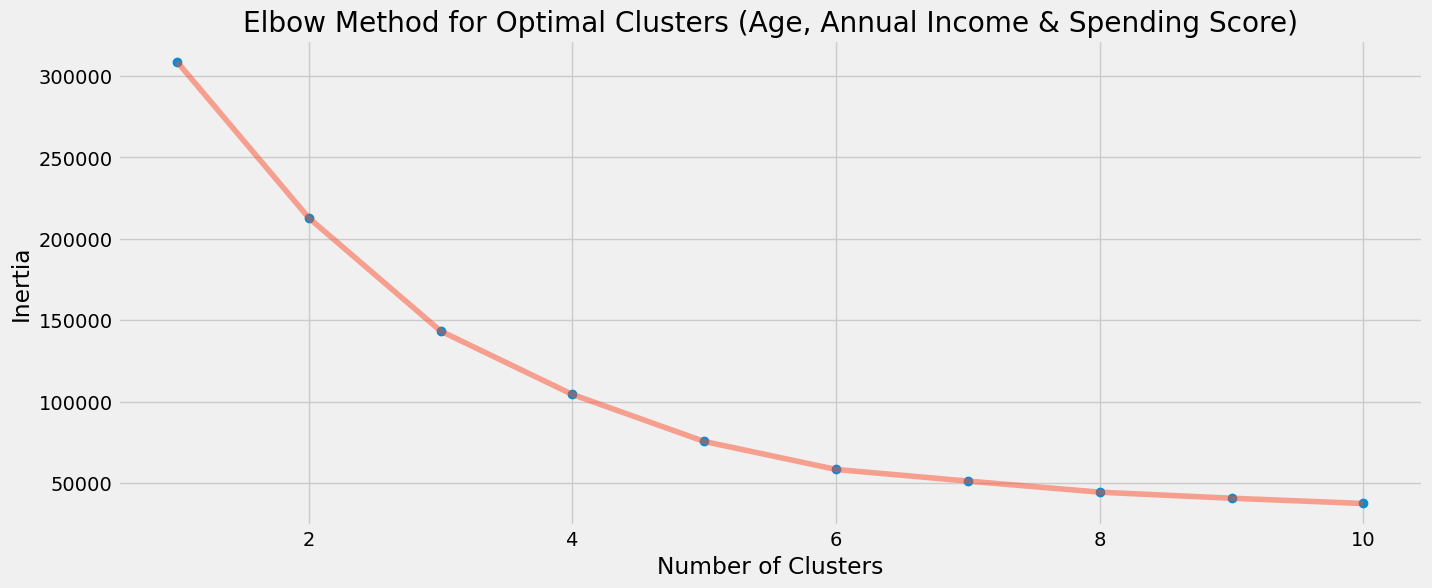

In [151]:
# Plot inertia to determine the optimal number of clusters
plt.figure(figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters (Age, Annual Income & Spending Score)')
plt.show()

In [154]:
# Fit K-Means with the chosen number of clusters (e.g., 6)
algorithm = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

## 6. 3D Plot of Clusters

For a more comprehensive view, we will create a 3D plot to visualize clusters based on three features: Age, Annual Income, and Spending Score.

This plot provides a spatial understanding of the clusters and helps in interpreting the multi-dimensional relationships between features.

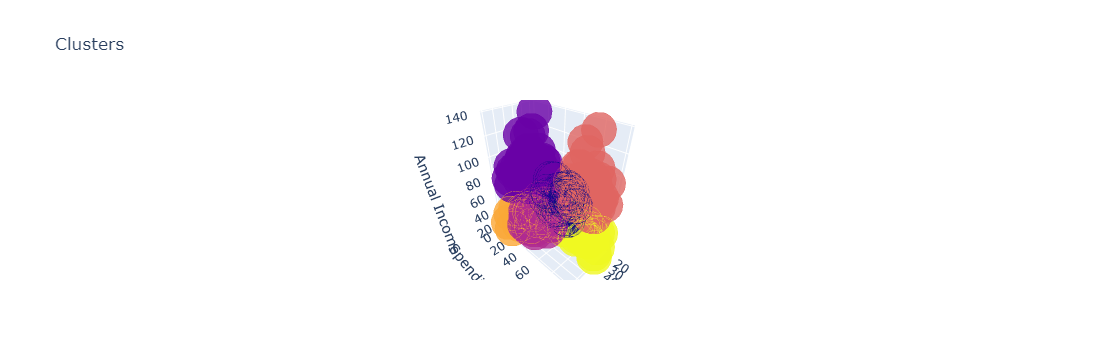

In [157]:
# Add cluster labels to the dataframe
df['label3'] = labels3

# 3D Plot of Clusters
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['label3'],
        size=20,
        line=dict(
            color=df['label3'],
            width=12
        ),
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)